# N Queen Attack Detection

In [ ]:
import matplotlib.pyplot as plt

def drawBoard(P):
  n = len(P)
  # Create a figure and axes
  fig, ax = plt.subplots()

  # Set axis limits and aspect ratio
  ax.set_xlim(0, n)
  ax.set_ylim(0, n)
  ax.set_aspect('equal')

  # Turn off axis ticks and labels
  ax.set_xticks([])
  ax.set_yticks([])

  # Draw the board grid
  for i in range(n + 1):
      ax.plot([0, n], [i, i], 'k-', linewidth=2) # Horizontal lines
      ax.plot([i, i], [0, n], 'k-', linewidth=2) # Vertical lines

  # Place queens
  for i in range(n):
    row, col = P[i]
    # Adjust for visual centering
    ax.text(col - 0.5 , n - row + 0.5, 'Q'+str(i + 1), ha='center', va='center', fontsize=12, color='red', weight='bold')

  # Show the plot
  plt.show()

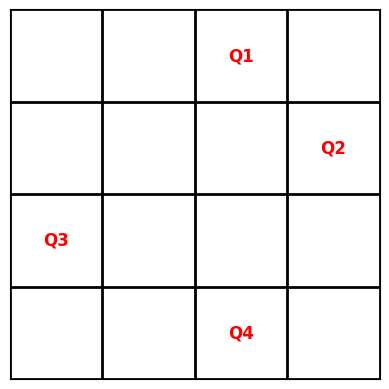

In [444]:
import random
def generatePositions(n = 4):
  pos = []
  numbers  = random.sample(range(1,n*n), n)
  for v in numbers:
    pos.append((v//n+1,v%n+1))
  return pos

positions = generatePositions()
drawBoard(positions)

In [ ]:
# row attack
def rowAttacK(P):
  count = 0
  for i, (rowi , _) in enumerate(P):
    for j in range(i+1,len(P)):
      if  rowi == P[j][0]:
        print(f'row attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
        count += 1
  return count

rowAttacK(positions)

row attack:Q1(2, 4) and Q2(2, 2)


1

In [ ]:
# Column attack
def colAttacK(P):
  count = 0
  for i, (_, coli) in enumerate(P):
    for j in range(i + 1, len(P)):
      if coli == P[j][1]:
        print(f'column attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
        count += 1
  return count

colAttacK(positions)

column attack:Q2(2, 2) and Q3(3, 2)


1

In [ ]:
# Diagonal attack
def diagAttacK(P):
  count = 0
  for i, (rowi, coli) in enumerate(P):
    for j in range(i + 1, len(P)):
      rowj, colj = P[j]
      if abs(rowi - rowj) == abs(coli - colj):
        print(f'diagonal attack:Q{i+1}{P[i]} and Q{j+1}{P[j]}')
        count += 1
  return count

diagAttacK(positions)

diagonal attack:Q1(2, 4) and Q4(1, 3)
diagonal attack:Q2(2, 2) and Q4(1, 3)


2

In [ ]:
# implement a method to print a state is valid or not
def rowAttacK(P):
    count = 0
    for i, (rowi, _) in enumerate(P):
        for j in range(i + 1, len(P)):
            if rowi == P[j][0]:
                count += 1
    return count

def columnAttack(P):
    count = 0
    for i, (_, col_i) in enumerate(P):
        for j in range(i + 1, len(P)):
            if col_i == P[j][1]:
                count += 1
    return count

def diagonalAttack(P):
    count = 0
    for i, (row_i, col_i) in enumerate(P):
        for j in range(i + 1, len(P)):
            row_j, col_j = P[j]
            if abs(row_i - row_j) == abs(col_i - col_j):
                count += 1
    return count

def isValid(P):
    # no attack = valid
    if rowAttacK(P) == 0 and columnAttack(P) == 0 and diagonalAttack(P) == 0:
        return True
    else:
        return False

# Example usage
if isValid(positions):
    print("The state is valid!")
else:
    print("The state is invalid!")


The state is invalid!


A solution was found at step 3


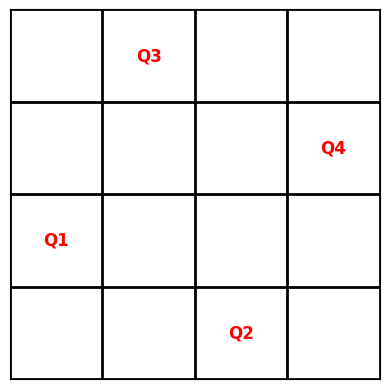

In [442]:
# call isValid untill you get valid solution
steps = 0
while(True):
  steps += 1
  pos = generatePositions(4)
  if isValid(pos):
    print(f'A solution was found at step {steps}')
    drawBoard(pos)
    break
  if steps >= 5:
    print(f'No solution was found in the first {steps} steps')
    break